In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.insert(0, "/home/lars/libraries/keras/")
from keras.preprocessing.image import *

Using TensorFlow backend.


In [2]:
img = np.zeros((1000,1000,3))
img[400:600, 400:600, :]=1

img[300:400, 100:200, :]=1

In [3]:
def draw_boxes(img, boxes):
    draw_img = img.copy()
    for box in boxes:
        x_min, y_min, x_max, y_max = box
        dim_x, dim_y = draw_img.shape[:2]
        x_min = int(x_min * dim_x)
        x_max = int(x_max * dim_x)
        y_min = int(y_min * dim_y)
        y_max = int(y_max * dim_y)
        
        x_min = max(0, x_min)
        x_max = min(dim_x, x_max)
        y_min = max(0, y_min)
        y_max = min(dim_y, y_max)

        draw_img[x_min:x_min+5, y_min:y_max]=[1,0,0]
        draw_img[x_max-5:x_max, y_min:y_max]=[1,0,0]
        draw_img[x_min:x_max, y_min:y_min+5]=[1,0,0]
        draw_img[x_min:x_max, y_max-5:y_max]=[1,0,0]
    return draw_img

def draw_verts(img, verts):
    draw_img = img.copy()
    for vert in verts:
        
        x, y = vert
        dim_x, dim_y = draw_img.shape[:2]
        x_min = int(x * dim_x)
        x_max = int(x * dim_x)
        y_min = int(y * dim_y)
        y_max = int(y * dim_y)
        
        x_min = x_min-5
        x_max = x_max+5
        y_min = y_min-5
        y_max = y_max+5
        
        if x_min > x_max:
            x_min, x_max = x_max, x_min
        
        if y_min > y_max:
            y_min, y_max = y_max, y_min
            
        x_min = max(0, x_min)
        x_max = min(dim_x, x_max)
        y_min = max(0, y_min)
        y_max = min(dim_y, y_max)
    
        
        draw_img[x_min:x_max, y_min:y_max]=[0,1,0]
    return draw_img

In [4]:
boxes = np.array([[0.4, 0.4, 0.6, 0.6],
                 [0.3, 0.1, 0.4, 0.2]])

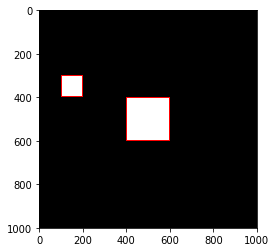

In [5]:
draw_img =draw_boxes(img, boxes)
plt.imshow(draw_img)

In [6]:
new_img, new_boxes, new_verts = random_shear_with_boxes(img, boxes, 0.3, row_axis=0, col_axis=1, channel_axis=2)

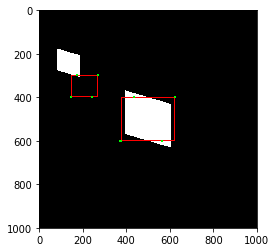

In [7]:
draw_img = draw_boxes(new_img, new_boxes)
draw_img = draw_verts(draw_img, new_verts)
plt.imshow(draw_img)